In [7]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255

# 백색 잡음 픽셀 추가
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)
# 0픽셀 추가
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

# 모델 생성
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# 잡음 모델 훈련
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

# 0 모델 훈련
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6202 - accuracy: 0.8126 - val_loss: 0.2868 - val_accuracy: 0.9132
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2495 - accuracy: 0.9219 - val_loss: 0.2110 - val_accuracy: 0.9355
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1640 - accuracy: 0.9493 - val_loss: 0.1576 - val_accuracy: 0.9520
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1181 - accuracy: 0.9639 - val_loss: 0.1439 - val_accuracy: 0.9601
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0870 - accuracy: 0.9726 - val_loss: 0.1310 - val_accuracy: 0.9607
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0653 - accuracy: 0.9794 - val_loss: 0.1306 - val_accuracy: 0.9613
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9848 - val_loss: 0.1216 - val_accuracy: 0.9661
Epoch 

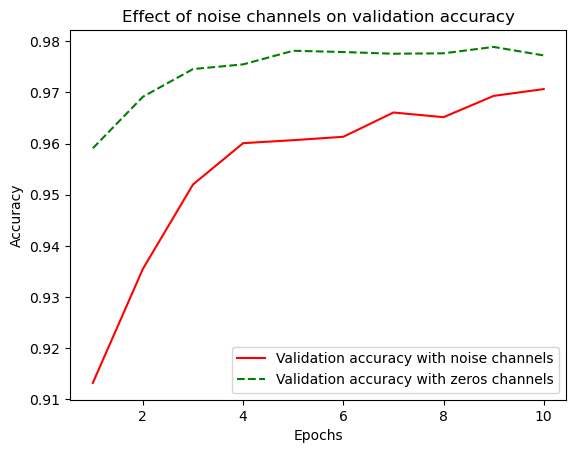

In [13]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "r-", # "red, -실선"
         label="Validation accuracy with noise channels")

plt.plot(epochs, val_acc_zeros, "g--", # "green, --점선"
         label="Validation accuracy with zeros channels")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()